<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/Convolutional_Neural_Networks_Basic_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Convolutional Neural Network Basic Design Patterns
---
---

Please use the GPU in Google Colab to significantly speed up the training time for machine learning models that use TensorFlow, PyTorch, or other frameworks. Google Colab provides free access to GPUs and TPUs to accelerate computational tasks. Here's how you can set up and use a GPU in Google Colab:

 **Change the runtime type to GPU**:
   - Go to the menu at the top of the notebook and click on `Runtime`.
   - Select `Change runtime type` from the dropdown menu.
   - A dialog box will appear. Under "Hardware accelerator," choose `GPU` from the dropdown menu.
   - Click `Save` to apply the changes. This will restart your Colab environment with GPU support.


## Libraries Imports

In [14]:
#import tensorflow and keras
import tensorflow as tf
import keras
from keras import layers, models, datasets

#import pandas and matplotlib for accurcy visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Loading Data

The above method truly shines when used with big images and especially multi-channel images

**The CIFAR-100** dataset is a well-known dataset used in machine learning and computer vision for evaluating image recognition algorithms. It is a more complex and diverse dataset compared to its counterpart, CIFAR-10, primarily due to the larger number of classes.

![Cifar100](https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-100-dataset-Activeloop-Platform-visualization-image.webp)

>- CIFAR-100 contains 60,000 32x32 color images.
>- The images are divided into 100 classes, each containing 600 images.
>- The 100 classes are grouped into 20 superclasses.
>- Each superclass encompasses several classes that are more specific; for example, the "aquatic mammals" superclass includes classes like "beaver", "dolphin", and "otter".

In [ ]:
# Loading the Dataset from Keras
cifar = datasets.cifar100
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data(label_mode='coarse')

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Simple CNN

Let's begin with our simple CNN design

In [ ]:
model = models.Sequential([
                          layers.Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(32, 32,3)),
                          layers.MaxPool2D(2,2),
                          layers.Flatten(),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(8, activation="relu"),
                          layers.Dense(20, activation="softmax")
                          ])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 16)                100368    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 20)                180       
                                                        

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=2000, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
23/23 [==============================] - 5s 45ms/step - loss: 2.9721 - accuracy: 0.0528 - val_loss: 2.9455 - val_accuracy: 0.0590
Epoch 2/30
23/23 [==============================] - 1s 31ms/step - loss: 2.9176 - accuracy: 0.0668 - val_loss: 2.8959 - val_accuracy: 0.0730
Epoch 3/30
23/23 [==============================] - 1s 30ms/step - loss: 2.8652 - accuracy: 0.0908 - val_loss: 2.8539 - val_accuracy: 0.1070
Epoch 4/30
23/23 [==============================] - 1s 31ms/step - loss: 2.8066 - accuracy: 0.1336 - val_loss: 2.7905 - val_accuracy: 0.1373
Epoch 5/30
23/23 [==============================] - 1s 31ms/step - loss: 2.7481 - accuracy: 0.1648 - val_loss: 2.7351 - val_accuracy: 0.1735
Epoch 6/30
23/23 [==============================] - 1s 31ms/step - loss: 2.6874 - accuracy: 0.1885 - val_loss: 2.6725 - val_accuracy: 0.1945
Epoch 7/30
23/23 [==============================] - 1s 36ms/step - loss: 2.6129 - accuracy: 0.2134 - val_loss: 2.5938 - val_accuracy: 0.2097
Epoch 8/30
23

In [ ]:
#Model evaluating
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 387.7241 - accuracy: 0.2234


[387.72406005859375, 0.22339999675750732]

## More Complex CNN Design

Convolutional Neural Networks (CNNs) have a variety of design patterns that have been developed over the years to address specific challenges in processing visual data. These design patterns are not just specific architectural choices but also include strategies and methodologies that have been proven effective.
We will cover most of these designs in the computer vision section of our course for now let' focus on the simplest and most straigh forward design making the neural net bigger by stacking the layers on top of each others:

**Layer Stacking**
   - **Pattern**: Stacking multiple convolutional layers before applying a pooling layer.
   - **Rationale**: This pattern allows the network to learn more complex features at each layer. The first convolutional layer might learn simple features like edges, the next layer learns combinations of edges (textures), and deeper layers can learn even more complex structures (like objects). Pooling is then used to reduce dimensionality and computational complexity.


In [ ]:
# Ensure GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPUs found. Running on CPU instead.")


Physical devices cannot be modified after being initialized


In [ ]:
 model = models.Sequential([

    # Layer 1: Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Flatten and add Dense layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                      

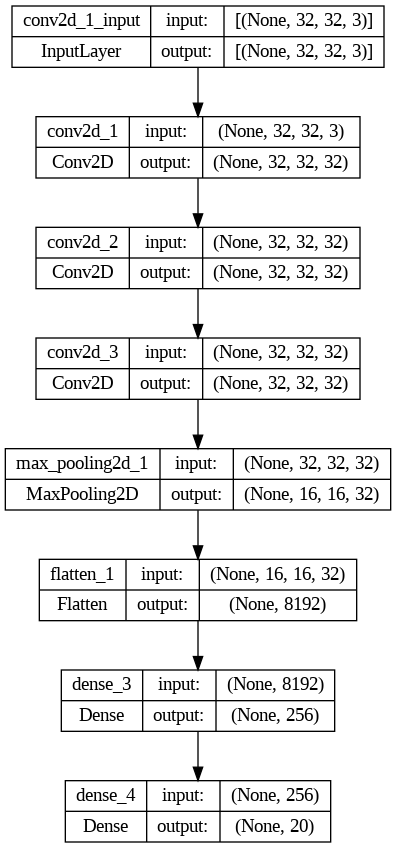

In [ ]:
# Display the model's architecture
keras.utils.plot_model(model, "CNN.png", show_shapes=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=1000, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
46/46 [==============================] - 10s 72ms/step - loss: 2.5250 - accuracy: 0.2295 - val_loss: 2.2756 - val_accuracy: 0.3072
Epoch 2/30
46/46 [==============================] - 3s 61ms/step - loss: 2.1804 - accuracy: 0.3345 - val_loss: 2.0945 - val_accuracy: 0.3618
Epoch 3/30
46/46 [==============================] - 3s 62ms/step - loss: 2.0005 - accuracy: 0.3891 - val_loss: 1.9977 - val_accuracy: 0.3860
Epoch 4/30
46/46 [==============================] - 3s 62ms/step - loss: 1.8728 - accuracy: 0.4235 - val_loss: 1.9021 - val_accuracy: 0.4165
Epoch 5/30
46/46 [==============================] - 3s 62ms/step - loss: 1.7647 - accuracy: 0.4603 - val_loss: 1.8855 - val_accuracy: 0.4190
Epoch 6/30
46/46 [==============================] - 3s 62ms/step - loss: 1.6509 - accuracy: 0.4938 - val_loss: 1.8159 - val_accuracy: 0.4367
Epoch 7/30
46/46 [==============================] - 3s 65ms/step - loss: 1.5550 - accuracy: 0.5207 - val_loss: 1.8064 - val_accuracy: 0.4560
Epoch 8/30
4

In [ ]:
#Model evaluating
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1487.9531 - accuracy: 0.3206


[1487.953125, 0.3206000030040741]

## We can even stack the entire block of layers

In [131]:

model = models.Sequential([

    # Layer 1: Convolutional Layer with L2 regularization and Dropout
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    # Layer 2: Convolutional Layer with L2 regularization and Dropout
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),

    # Flatten and add Dense layers with Dropout and L2 regularization
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_317 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_318 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_319 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_106 (MaxPooling2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_320 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_321 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_322 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_107 (MaxPooling2D)     │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_54 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,165,716 (4.45 MB)

 Trainable params: 1,165,716 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
  model = models.Sequential([

    # Layer 1: Convolutional Layer with modified stride and dropout
    layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.02),  # Adding Dropout of 2%

    # Layer 2: Convolutional Layer with modified stride and dropout
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='same'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2), padding='same'),
   layers.Dropout(0.02),  # Adding Dropout of 2%

    # Flatten and add Dense layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # Adding L2 Regularization
    layers.Dropout(0.05),   # Adding Dropout of 5%
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    # Output layer
    layers.Dense(20, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_305 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_306 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_307 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_102 (MaxPooling2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_308 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_309 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_310 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_103 (MaxPooling2D)     │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_52 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,231,508 (4.70 MB)

 Trainable params: 1,231,508 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history = model.fit(X_train, y_train, batch_size=1000, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.0658 - loss: 9.8750 - val_accuracy: 0.1217 - val_loss: 8.4167
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.1472 - loss: 8.0205 - val_accuracy: 0.1885 - val_loss: 7.0646
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2016 - loss: 6.8333 - val_accuracy: 0.2305 - val_loss: 6.1847
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.2292 - loss: 6.0255 - val_accuracy: 0.2515 - val_loss: 5.5327
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.2560 - loss: 5.4121 - val_accuracy: 0.2605 - val_loss: 5.0594
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.2740 - loss: 4.9581 - val_accuracy: 0.2880 - val_loss: 4.6743
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.2851 - loss: 4.6106 - val_accuracy: 0.3052 - val_loss: 4.3725
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.2982 - loss: 4.3268 - val_accuracy: 0

In [132]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0509 - loss: 17.4191


[17.4265079498291, 0.05119999870657921]

In [78]:
  model = models.Sequential([

    # Layer 1: Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Layer 2: Convolutional Layer plus changing the nodes
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Flatten and add Dense layers for classification
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_167 (Conv2D)                  │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_168 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_169 (Conv2D)                  │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_170 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_171 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_172 (Conv2D)                  │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_29 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,165,716 (4.45 MB)

 Trainable params: 1,165,716 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

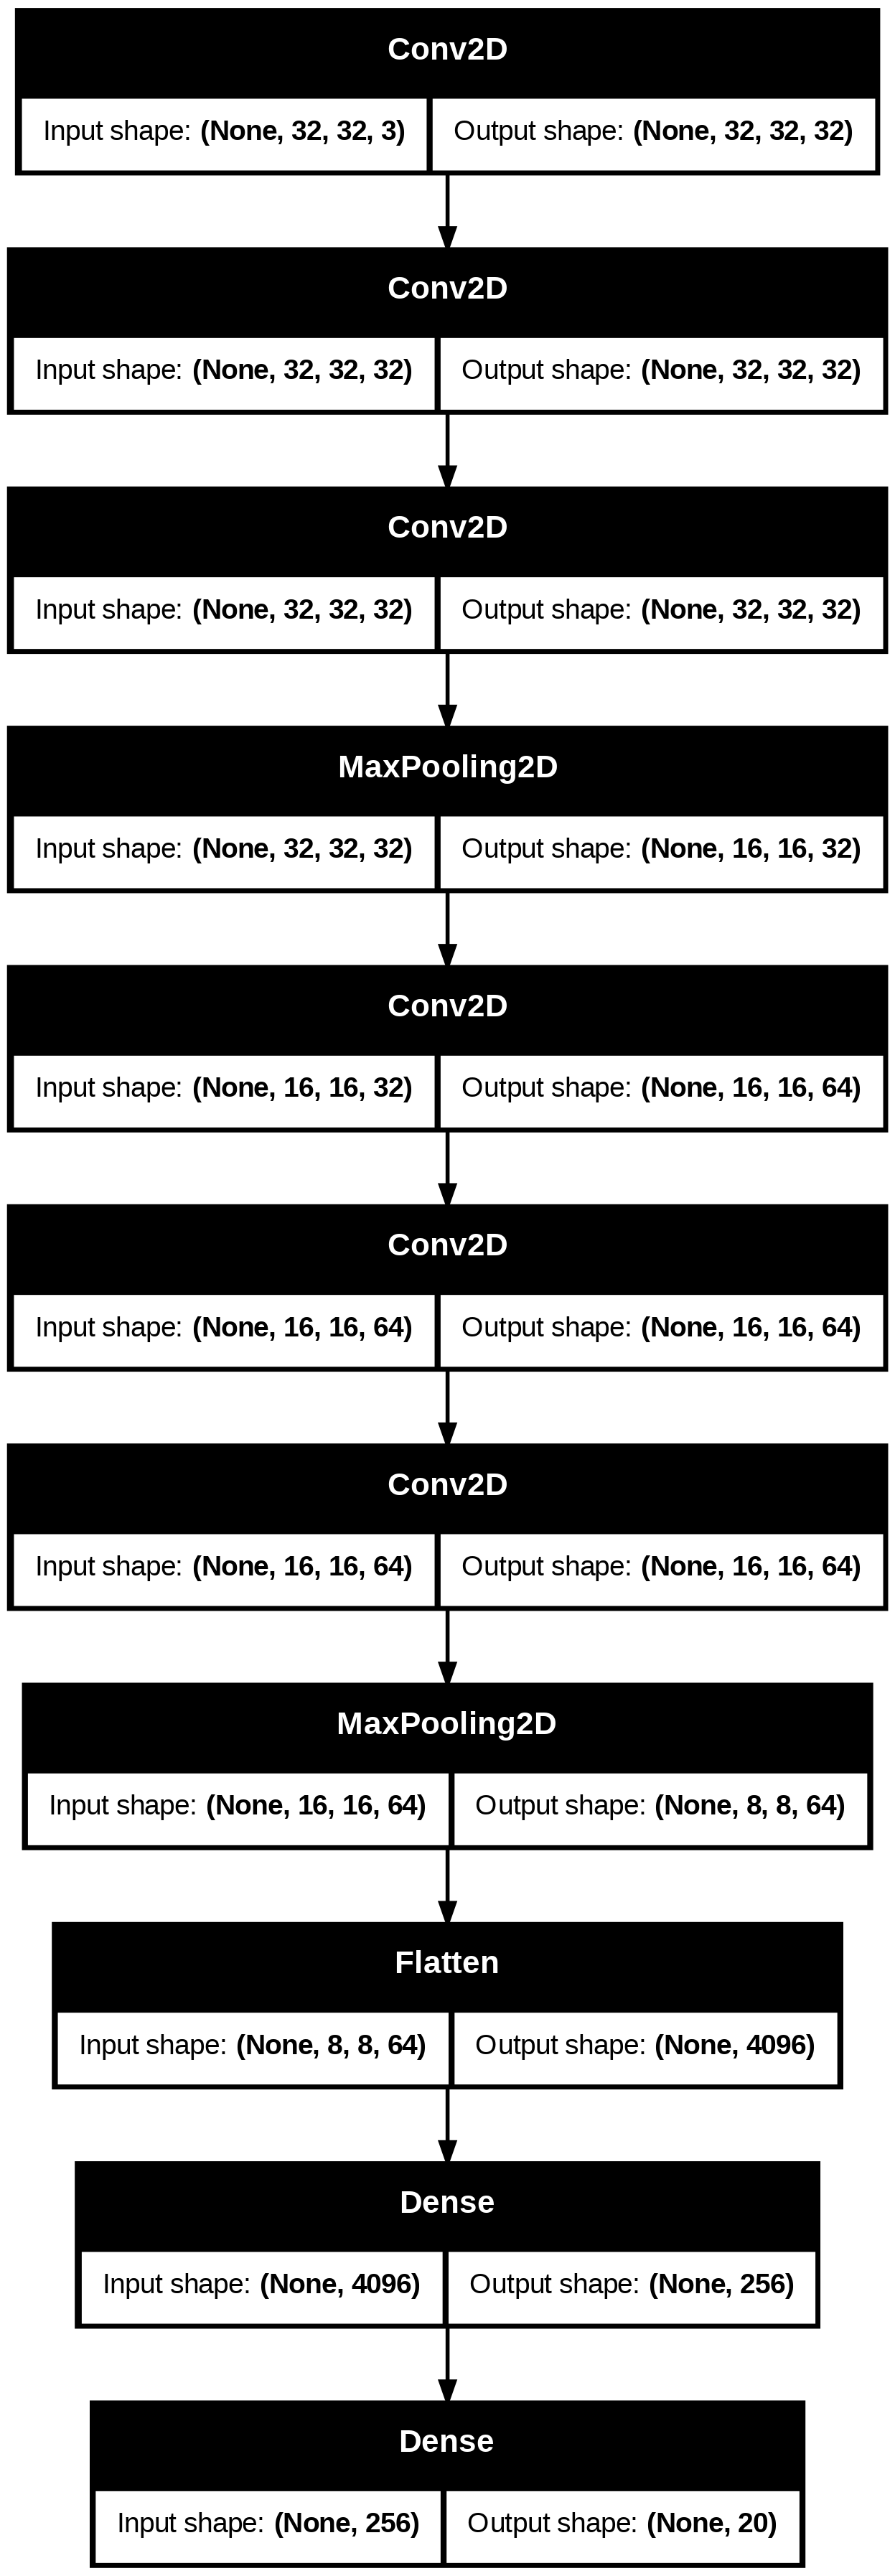

In [18]:
# Display the model's architecture
keras.utils.plot_model(model, "CNN.png", show_shapes=True)

In [19]:
#  Train the model
history = model.fit(X_train, y_train, batch_size=1000, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.1230 - loss: 2.8352 - val_accuracy: 0.2702 - val_loss: 2.3811
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.2879 - loss: 2.3177 - val_accuracy: 0.3370 - val_loss: 2.1660
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.3547 - loss: 2.0893 - val_accuracy: 0.3868 - val_loss: 1.9769
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4088 - loss: 1.9303 - val_accuracy: 0.4053 - val_loss: 1.9251
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4459 - loss: 1.7873 - val_accuracy: 0.4248 - val_loss: 1.8504
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.4767 - loss: 1.6948 - val_accuracy: 0.4577 - val_loss: 1.7746
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5192 - loss: 1.5554 - val_accuracy: 0.4778 - val_loss: 1.7196
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5488 - loss: 1.4532 - val_accuracy: 0.48

In [84]:
#Model evaluating


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0500 - loss: 18.0838


[18.107892990112305, 0.050200000405311584]

**It appears the pervious design is overfitting**

**Excerise**:
>- Try out different designs yourself and experiment with conv options such as filter size and stride and padding
>- Use Dropout and regularization to overcome the overfitting problem
- Below is a quick reminder on some of these options in conv layers

The `Conv2D` layer in Keras is a key component used primarily in models that deal with image data. This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. Here's an explanation of the most commonly used parameters and options for `Conv2D`:

### 1. **filters**
- **Description**: This parameter specifies the number of output filters in the convolution, which corresponds to the number of feature maps created by the convolution.
- **Usage**: A higher number of filters allows the network to learn more features from the input image. The choice of how many filters to use depends on the complexity of the dataset and the depth of the network layer.

### 2. **kernel_size**
- **Description**: The size of the kernel (filter) used in the convolution. It specifies the height and width of the convolution window.
- **Usage**: Common choices are (3, 3) or (5, 5). Smaller kernels will capture finer details, while larger kernels help in capturing broader features of the input.

### 3. **strides**
- **Description**: The stride determines the step size the convolution kernel moves across the image or input matrix. It is defined for both the height and width directions.
- **Usage**: A stride of (1, 1) means the filter moves one pixel at a time, which is common for high-resolution feature learning. Larger strides like (2, 2) are used for downsampling features quickly, reducing the spatial dimensions of the output, and thus reducing computation and controlling overfitting.

### 4. **padding**
- **Description**: This parameter can either be 'valid' or 'same'.
  - `'valid'` padding means no padding is applied, and the convolution is only applied to valid positions inside the input.
  - `'same'` ensures that the output has the same spatial dimensions as the input, by padding the input accordingly on all sides.
- **Usage**: `'same'` is often used when you want to preserve the spatial dimensions of the input, allowing deeper layers without reducing the size too quickly. `'valid'` might be chosen when you are fine with the output shrinking slightly and wish to reduce computational load.
